# Exploratory Data Analysis

In [58]:
import pandas as pd
import missingno
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from scipy.stats import spearmanr
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_theme(style="white")


Importing the final dataset.

In [59]:
df = pd.read_csv("../Data/final_dataset.csv")

## Data Quality

Looking at the distribution of null values in the dataset.

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CountryCode                      89 non-null     object 
 1   CountryName                      89 non-null     object 
 2   TourismEmploymentPer1000         89 non-null     float64
 3   FoodEmploymentPer1000            69 non-null     float64
 4   TourismGDPPercentage             69 non-null     float64
 5   BusinessToPersonalRatio          76 non-null     float64
 6   AverageStayDays                  76 non-null     float64
 7   InboundArrivalsPer1000           83 non-null     float64
 8   DomesticTouristsPer1000          58 non-null     float64
 9   InboundToOutboundRatio           60 non-null     float64
 10  CostOfLivingIndex                85 non-null     float64
 11  GroceriesCostIndex               85 non-null     float64
 12  RestaurantPriceIndex    

In [61]:
df.isnull().sum()

CountryCode                         0
CountryName                         0
TourismEmploymentPer1000            0
FoodEmploymentPer1000              20
TourismGDPPercentage               20
BusinessToPersonalRatio            13
AverageStayDays                    13
InboundArrivalsPer1000              6
DomesticTouristsPer1000            31
InboundToOutboundRatio             29
CostOfLivingIndex                   4
GroceriesCostIndex                  4
RestaurantPriceIndex                4
SafetyIndex                         1
HealthCareIndex                    23
PollutionIndex                     15
QualityOfLifeIndex                 27
ClimateIndex                       27
TrafficIndex                       26
TrafficTimeIndexMinutes            26
TrafficInefficiencyIndex           26
ReverseTrafficInefficiencyIndex    26
ReverseTrafficTimeIndexMinutes     26
ReverseTrafficIndex                26
ReversePollutionIndex              15
dtype: int64

<Axes: >

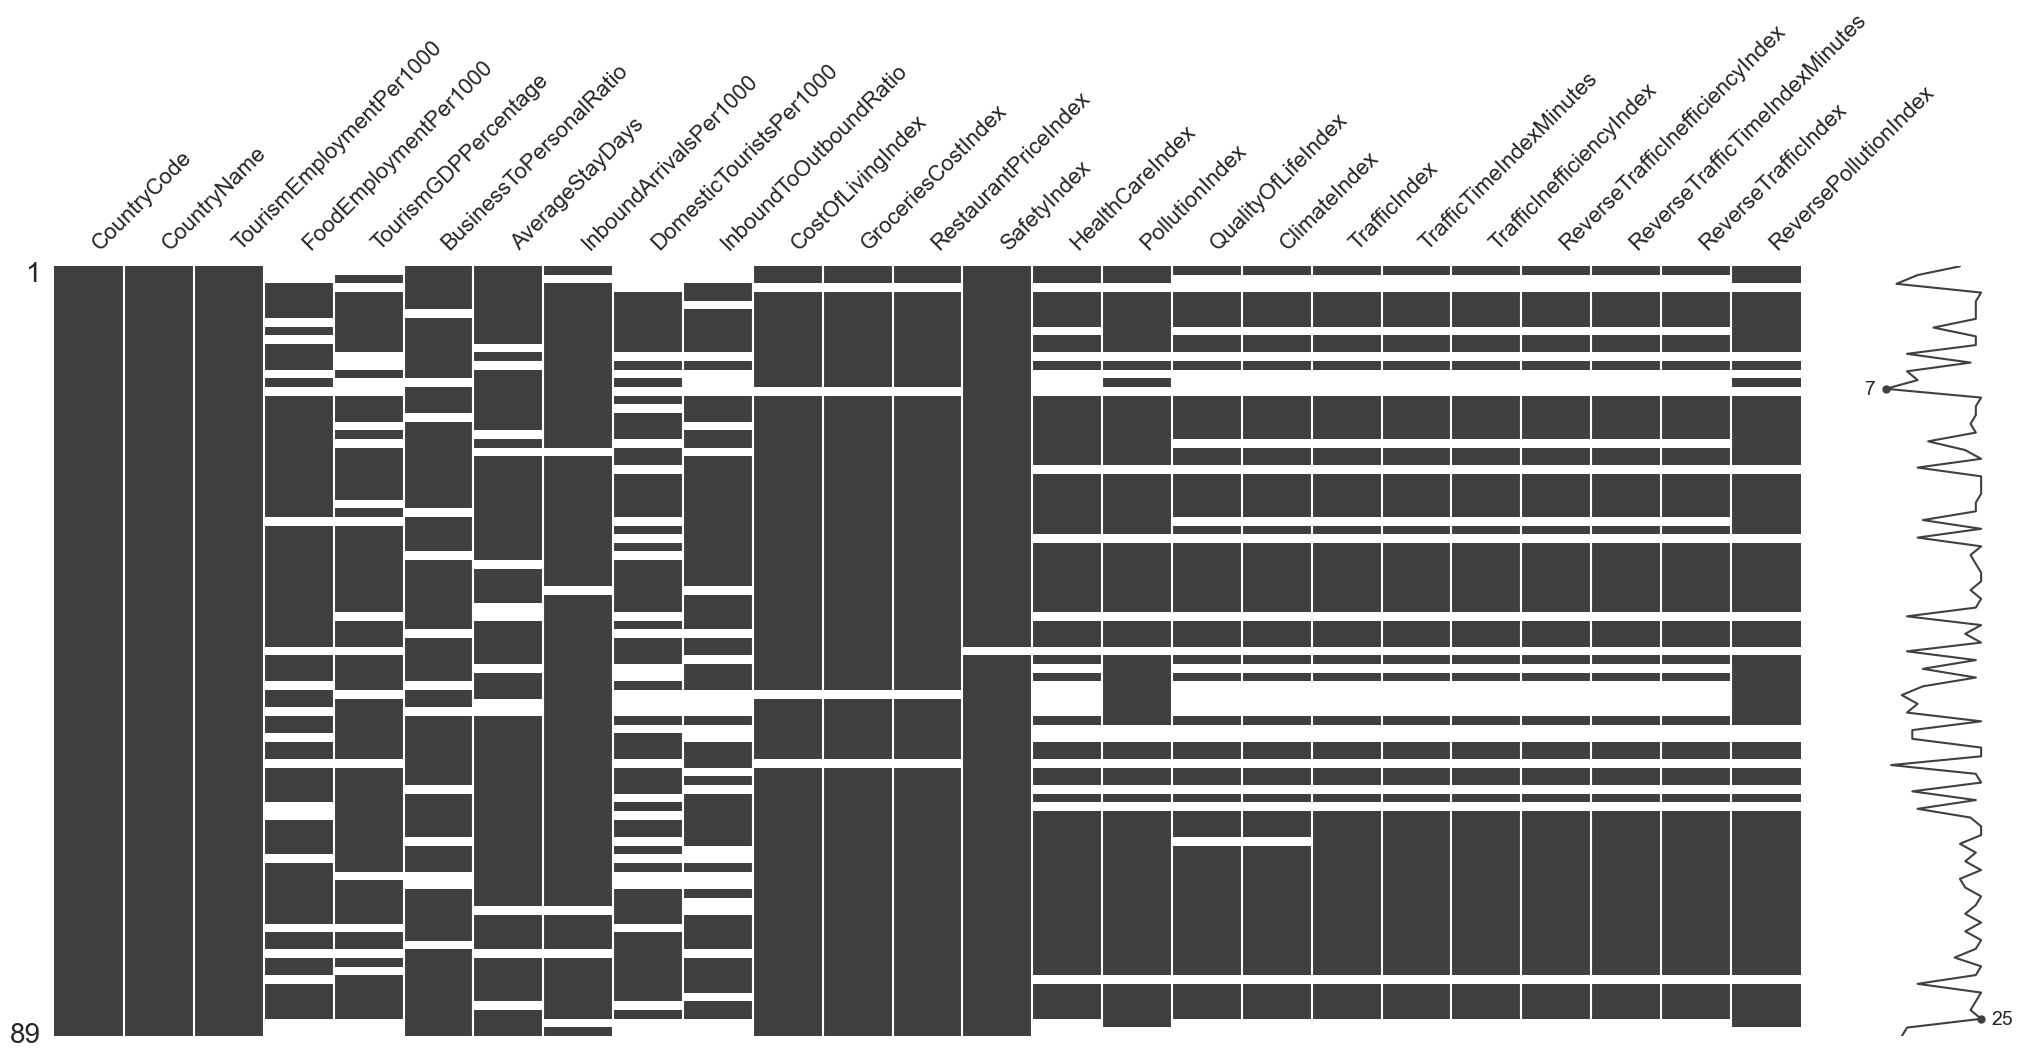

In [62]:
missingno.matrix(df)

In the worse case scenario, there are countries with as low as 7 features. The best case scenario is countries having all 25 features. 

In [63]:
df.duplicated().sum()

0

No duplicate entries found.

In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TourismEmploymentPer1000,89.0,25.639881,30.208117,0.864344,7.796310,19.709909,32.664306,197.352016
FoodEmploymentPer1000,69.0,12.246579,11.200774,0.182560,4.457795,9.858471,16.525622,54.312951
TourismGDPPercentage,69.0,3.578292,2.414450,0.061836,1.890788,3.104375,4.807650,11.728354
BusinessToPersonalRatio,76.0,0.243344,0.302023,0.009091,0.075744,0.129049,0.294344,1.764563
AverageStayDays,76.0,4.094567,3.644277,1.330224,2.027468,2.596871,4.368941,22.250457
InboundArrivalsPer1000,83.0,467.887608,810.467671,0.933245,41.244642,152.022395,579.640235,5825.335690
DomesticTouristsPer1000,58.0,1242.807826,1063.717487,0.153039,470.210368,1067.305597,1682.990724,5157.844808
InboundToOutboundRatio,60.0,2.337931,2.771569,0.197945,0.633283,1.470492,2.730327,15.654869
CostOfLivingIndex,85.0,41.295294,14.694038,19.000000,30.400000,38.800000,49.400000,98.400000
GroceriesCostIndex,85.0,43.062353,15.575301,19.700000,33.200000,40.100000,54.500000,103.100000


Features have very different scales, however by introducing the engineered "inverse"-like columns, all of them have a increasing monotone structure and meaning.

Looking at feature distribution.

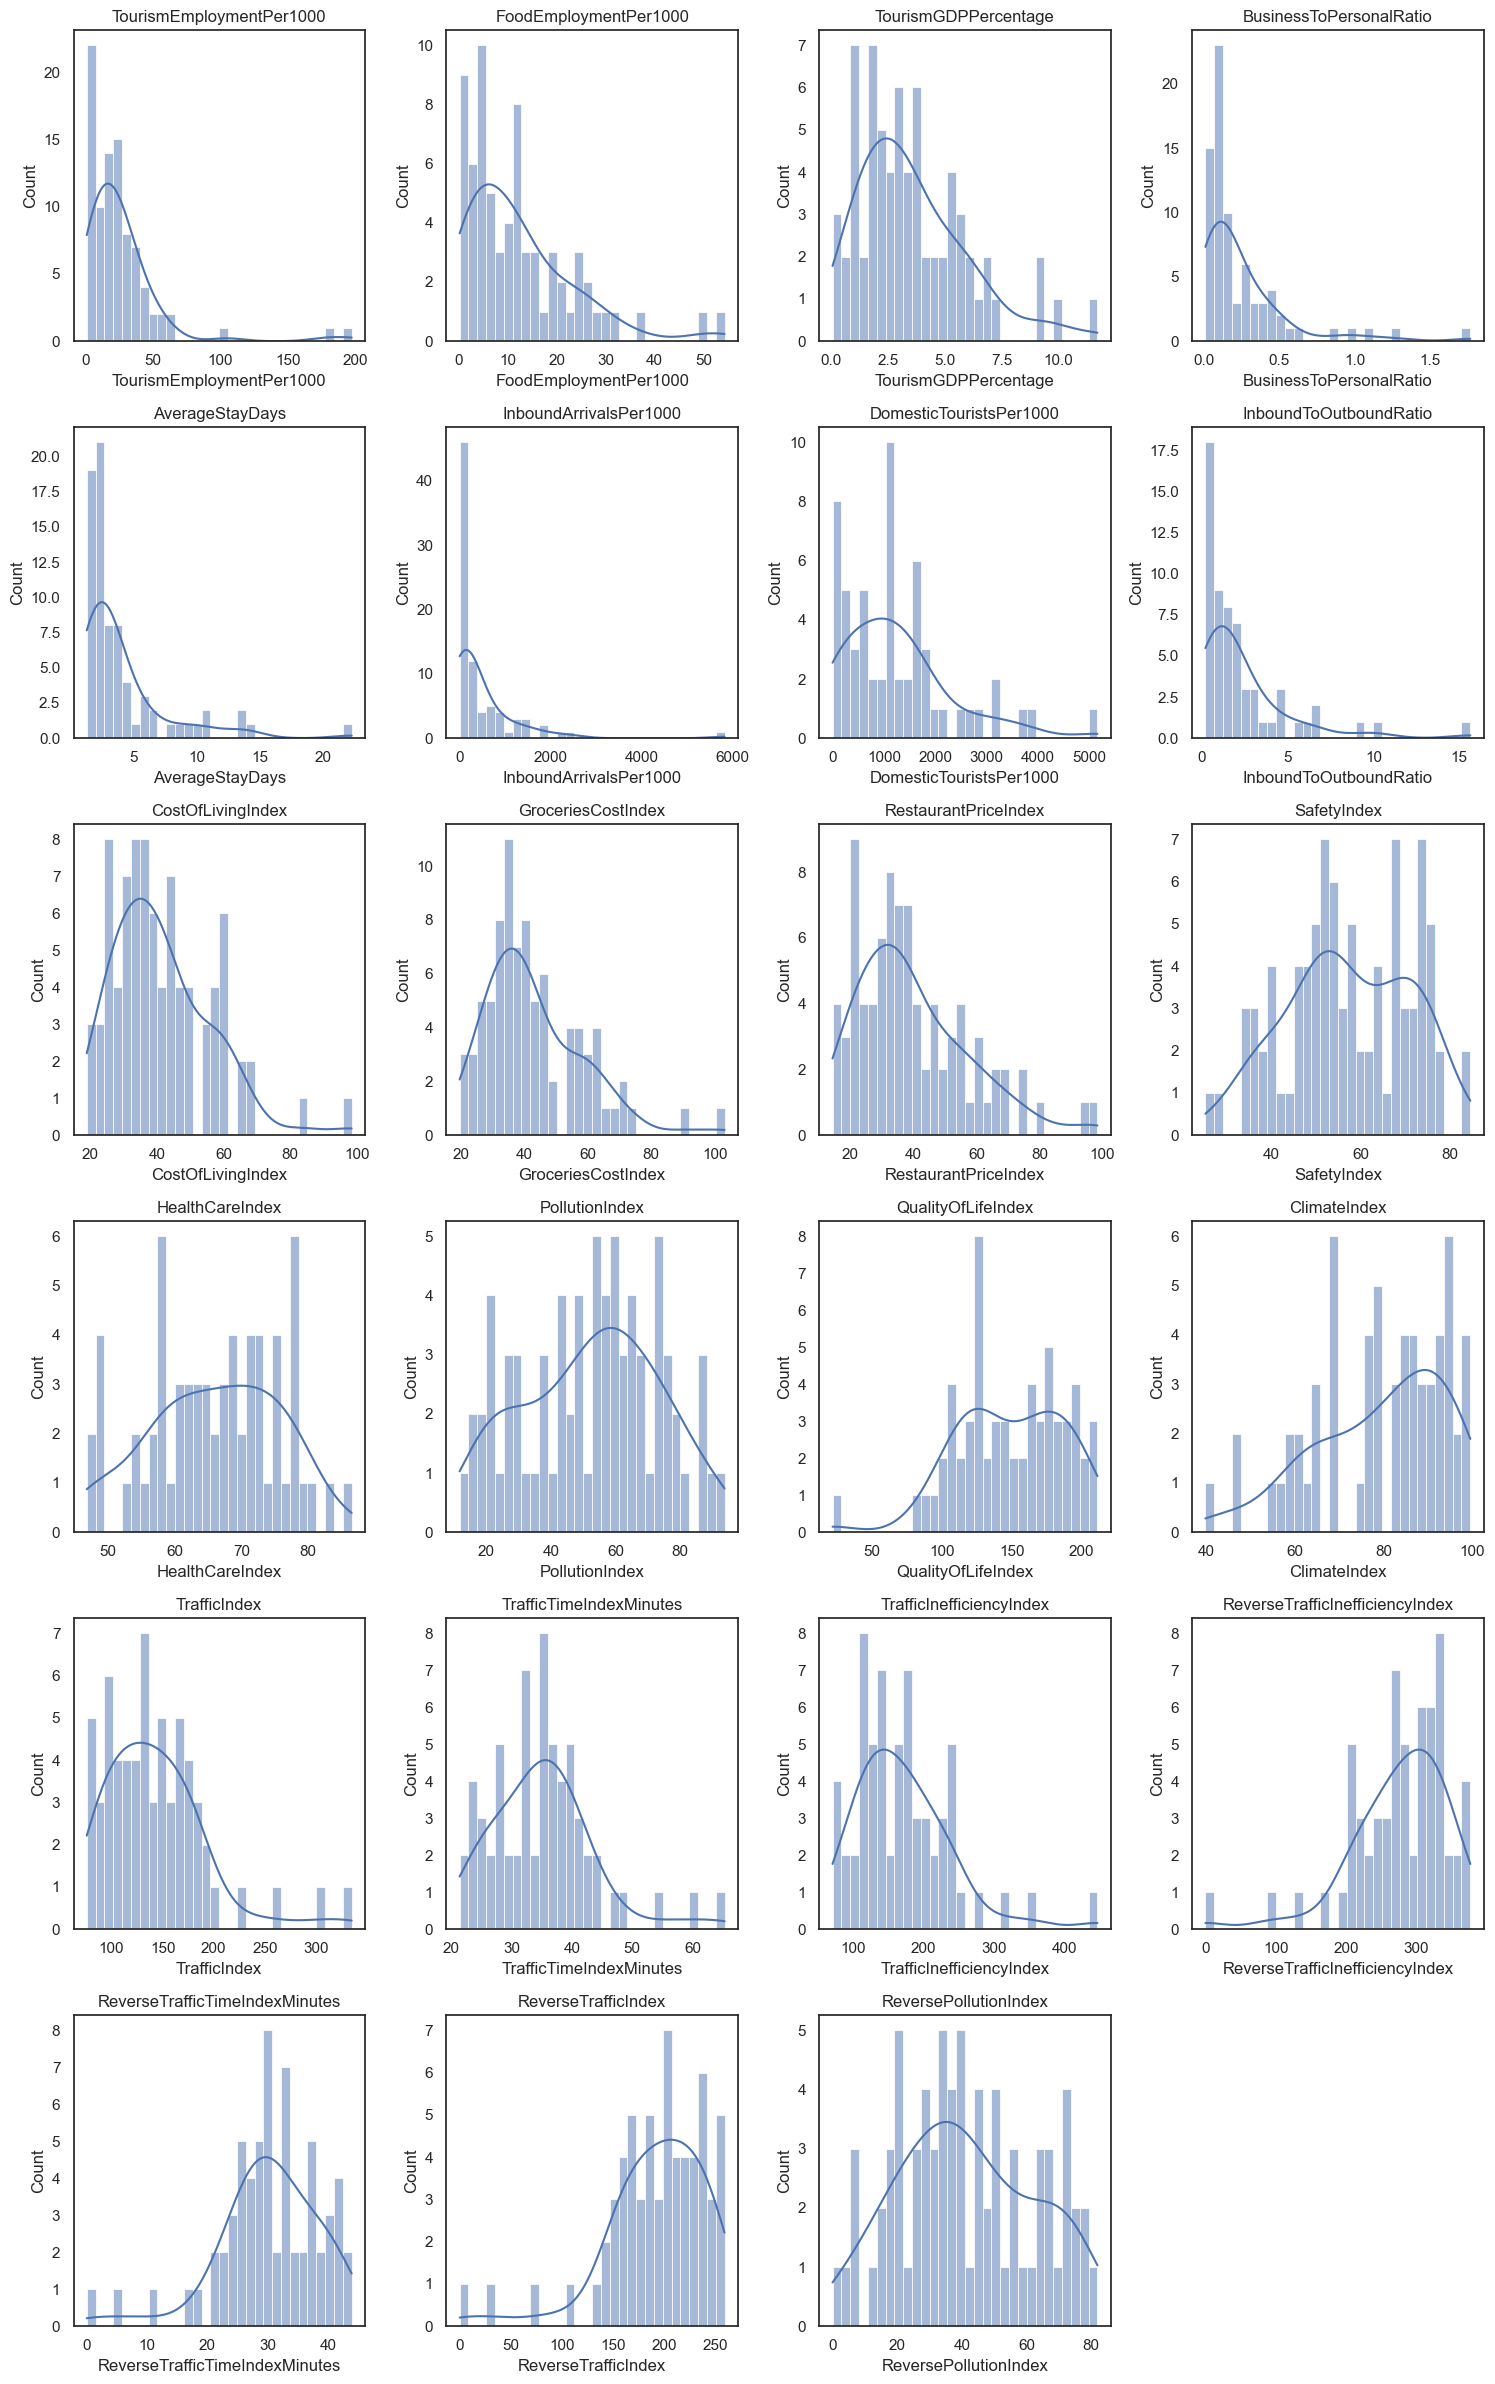

In [65]:
numerical_columns = df.select_dtypes(include=['number']).columns

# Set up the number of rows and columns for subplots
num_features = len(numerical_columns)
num_cols = 4  
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)  

# Set up the figure size
plt.figure(figsize=(15, num_rows * 4))

# Loop through numerical columns and plot distributions
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

## Comparative Analysis

### Safety vs Healthcare

Comparing Safety Index and Healthcare Index and looking see if they are correlated.

In [66]:
# Select relevant columns and drop rows with NaN values in either column
subset = df[['CountryName', 'SafetyIndex', 'HealthCareIndex']].dropna()
print(subset.shape[0])

66


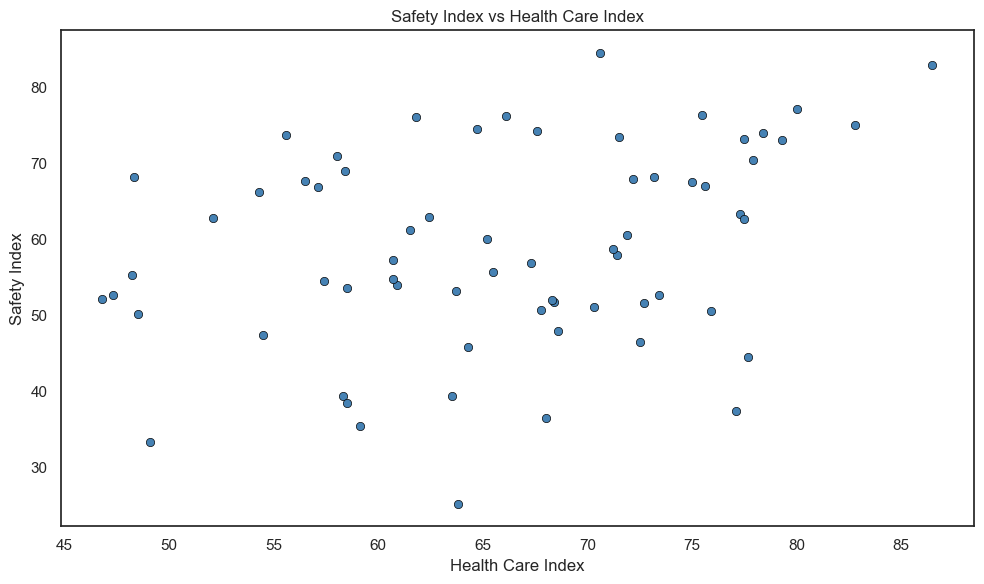

In [67]:
# Create a clearer scatter plot with uniform dot color
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(
    data=subset,
    x='HealthCareIndex',
    y='SafetyIndex',
    color='steelblue',
    edgecolor='black'
)
plt.title('Safety Index vs Health Care Index')
plt.xlabel('Health Care Index')
plt.ylabel('Safety Index')
plt.tight_layout()
plt.show()

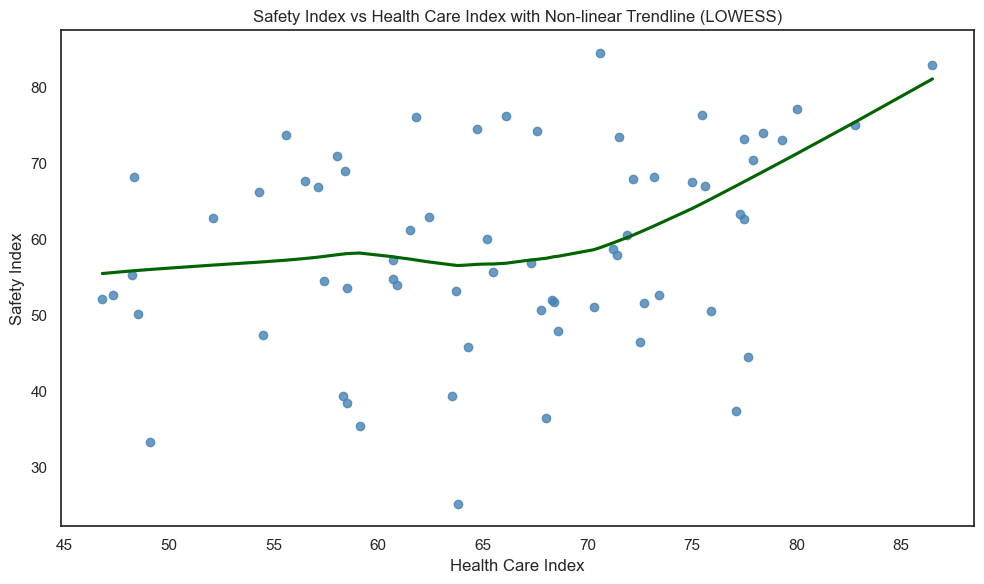

In [68]:
# Plot with non-linear trendline using lowess smoothing
plt.figure(figsize=(10, 6))
sns.set_theme(style="white")
nonlinear_plot = sns.regplot(
    data=subset,
    x='HealthCareIndex',
    y='SafetyIndex',
    scatter_kws={'color': 'steelblue'},
    line_kws={'color': 'darkgreen'},
    lowess=True
)
plt.title('Safety Index vs Health Care Index with Non-linear Trendline (LOWESS)')
plt.xlabel('Health Care Index')
plt.ylabel('Safety Index')
plt.tight_layout()
plt.show()


In [69]:
# Calculate Pearson correlation coefficient and p-value
corr_coef, p_value = spearmanr(subset['HealthCareIndex'], subset['SafetyIndex'])

# Round values
rounded_corr = round(corr_coef, 2)
rounded_p = round(p_value, 4)

# Interpret correlation strength with buffer ranges
if abs(rounded_corr) < 0.28:
    strength = "weak"
elif abs(rounded_corr) < 0.33:
    strength = "borderline weak-to-moderate"
elif abs(rounded_corr) < 0.57:
    strength = "moderate"
elif abs(rounded_corr) < 0.63:
    strength = "borderline moderate-to-strong"
else:
    strength = "strong"

# Interpret significance
if rounded_p < 0.05:
    significance = "statistically significant"
else:
    significance = "not statistically significant"

# Output
print(f"Pearson Correlation Coefficient: {rounded_corr}")
print(f"→ This indicates a {strength} positive correlation between Health Care Index and Safety Index.")

print(f"\nP-value: {rounded_p}")
print(f"→ Since it's {'below' if rounded_p < 0.05 else 'above'} 0.05, this correlation is {significance}.")

Pearson Correlation Coefficient: 0.28
→ This indicates a borderline weak-to-moderate positive correlation between Health Care Index and Safety Index.

P-value: 0.0248
→ Since it's below 0.05, this correlation is statistically significant.


In [70]:
# Rank the data
ranked_data = subset[['CountryName', 'HealthCareIndex', 'SafetyIndex']].copy()
ranked_data['HealthCareRank'] = ranked_data['HealthCareIndex'].rank(ascending=False)
ranked_data['SafetyRank'] = ranked_data['SafetyIndex'].rank(ascending=False)
ranked_data['RankDifference'] = abs(ranked_data['HealthCareRank'] - ranked_data['SafetyRank'])

# Sort by difference for clarity in plotting
ranked_data_sorted = ranked_data.sort_values(by='RankDifference', ascending=False)

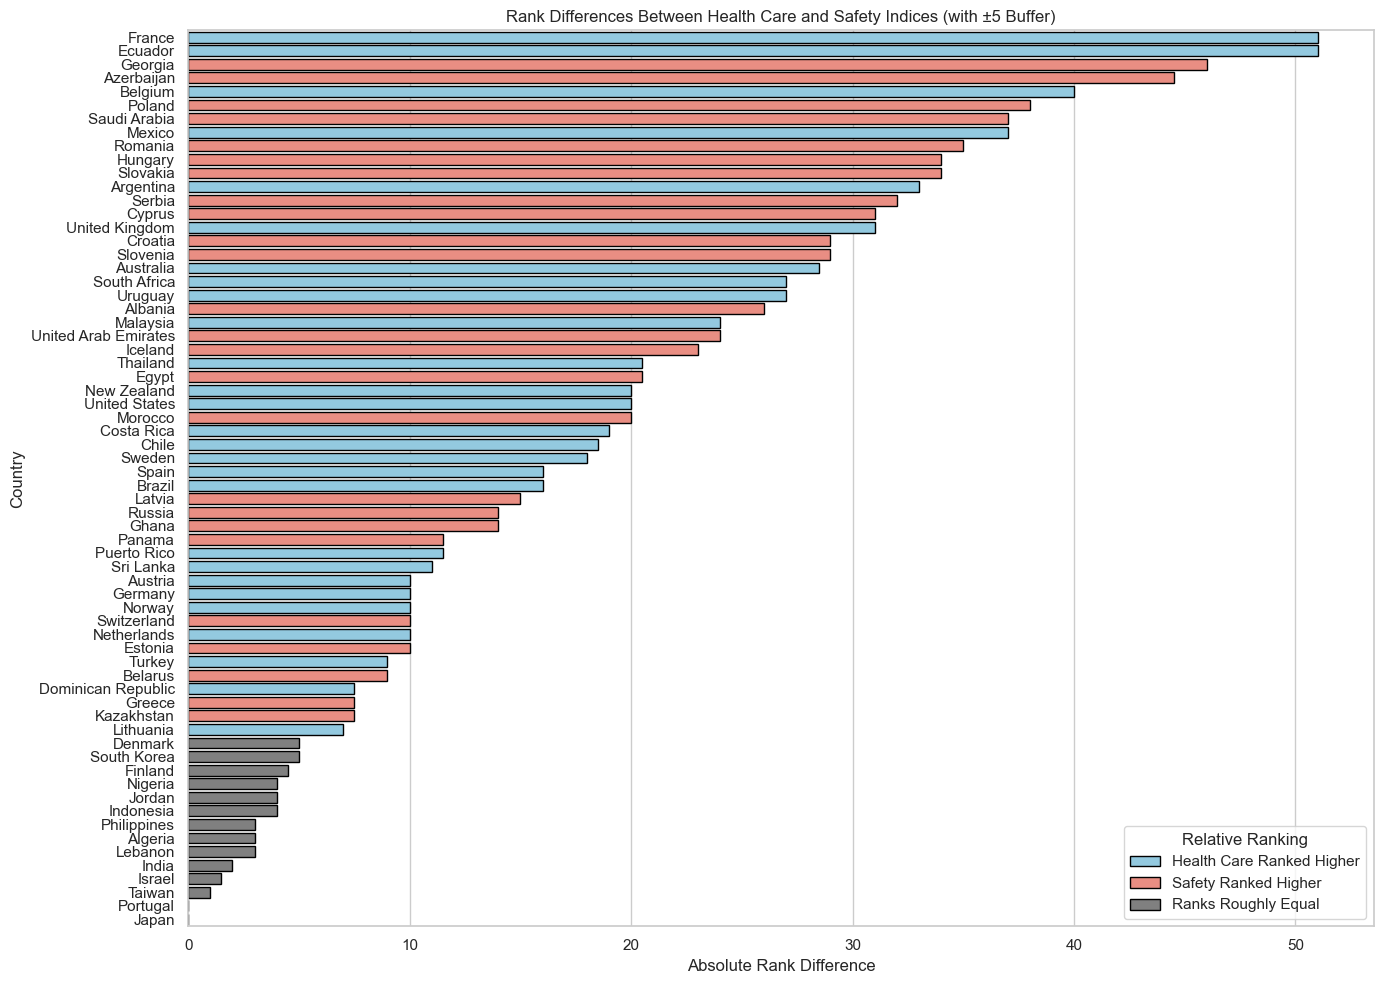

In [71]:
# Recalculate "Same Rank" using a buffer of ±5
ranked_data['HigherRankingBuffered'] = np.where(
    abs(ranked_data['HealthCareRank'] - ranked_data['SafetyRank']) <= 5,
    'Ranks Roughly Equal',
    np.where(
        ranked_data['HealthCareRank'] < ranked_data['SafetyRank'],
        'Health Care Ranked Higher',
        'Safety Ranked Higher'
    )
)

# Sort for plotting
ranked_data_sorted = ranked_data.sort_values(by='RankDifference', ascending=False)

# Plot with buffered interpretation of rank similarity
plt.figure(figsize=(14, 10))
sns.set_theme(style="whitegrid")
barplot = sns.barplot(
    data=ranked_data_sorted,
    x='RankDifference',
    y='CountryName',
    hue='HigherRankingBuffered',
    dodge=False,
    palette={
        'Health Care Ranked Higher': 'skyblue',
        'Safety Ranked Higher': 'salmon',
        'Ranks Roughly Equal': 'gray'
    },
    edgecolor='black'
)
plt.title('Rank Differences Between Health Care and Safety Indices (with ±5 Buffer)')
plt.xlabel('Absolute Rank Difference')
plt.ylabel('Country')
plt.legend(title='Relative Ranking')
plt.tight_layout()
plt.show()



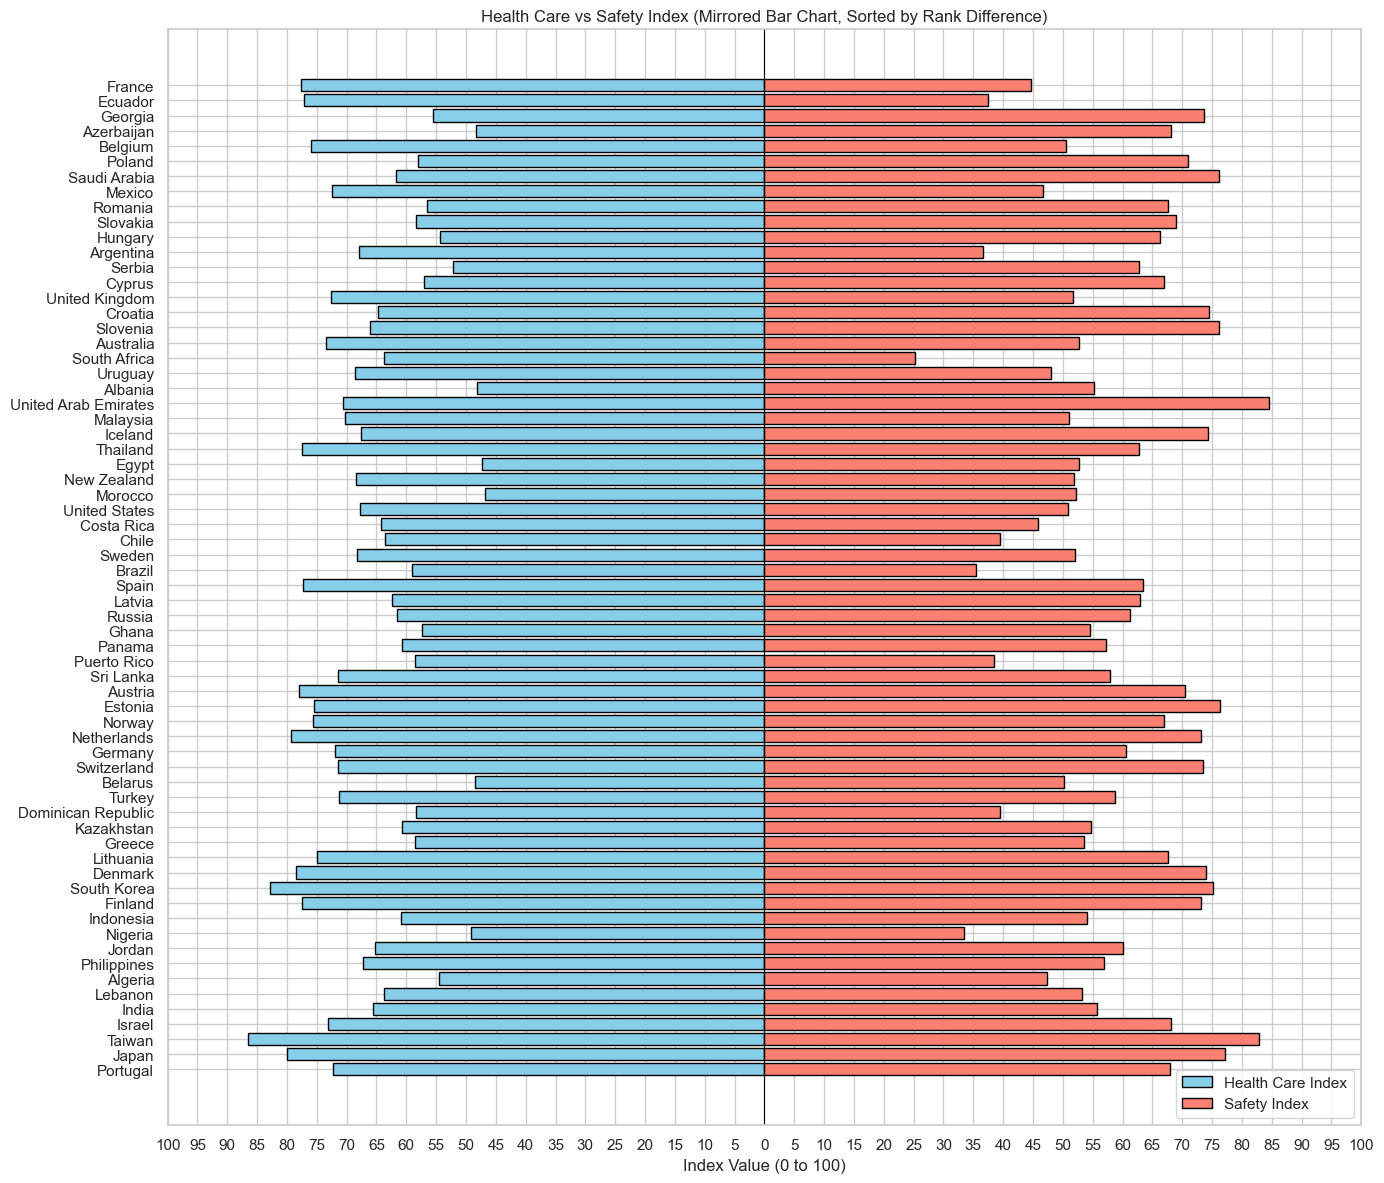

In [72]:
# Sort by the original absolute rank difference (as in the rank difference chart)
ranked_data_sorted = ranked_data.sort_values(by='RankDifference', ascending=True)

# Plot mirrored bar chart using raw index values (no normalization)
plt.figure(figsize=(14, 12))
sns.set_theme(style="whitegrid")

# Left bars (Health Care Index) as negative
plt.barh(
    ranked_data_sorted['CountryName'],
    -ranked_data_sorted['HealthCareIndex'],
    color='skyblue',
    edgecolor='black',
    label='Health Care Index'
)

# Right bars (Safety Index)
plt.barh(
    ranked_data_sorted['CountryName'],
    ranked_data_sorted['SafetyIndex'],
    color='salmon',
    edgecolor='black',
    label='Safety Index'
)

# Update tick labels to show as positive, even on the negative side
xrange =range(-100, 101, 5)
plt.xticks(
    ticks=xrange,
    labels=[str(abs(x)) for x in xrange]
)


plt.axvline(0, color='black', linewidth=0.8)
plt.xlabel('Index Value (0 to 100)')
plt.title('Health Care vs Safety Index (Mirrored Bar Chart, Sorted by Rank Difference)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


### Climate vs Quality vs Safety vs Pollution

c:\Users\iulia\anaconda3\envs\general_practice\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\iulia\anaconda3\envs\general_practice\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


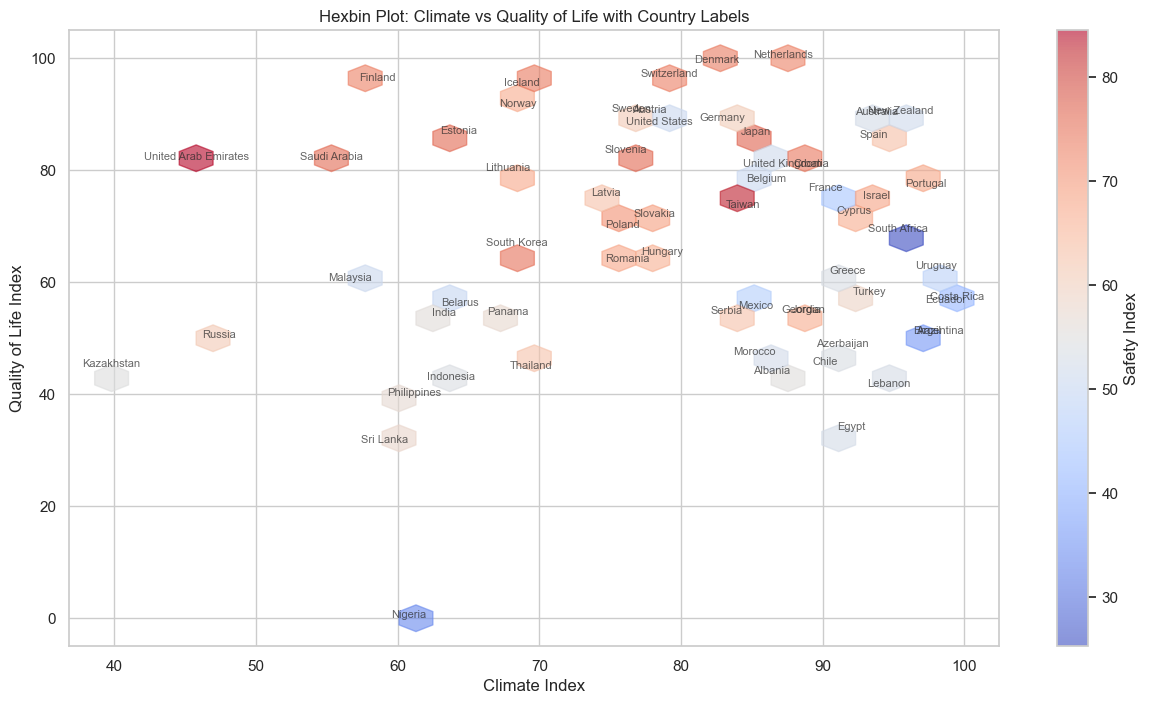

In [73]:
subset = df[['CountryName', 'ClimateIndex', 'QualityOfLifeIndex', 'SafetyIndex', 'PollutionIndex']].dropna()

scaler = MinMaxScaler(feature_range=(0, 100))
subset['QualityOfLifeIndex'] = scaler.fit_transform(subset[['QualityOfLifeIndex']])

data = subset[['CountryName','ClimateIndex','QualityOfLifeIndex', 'SafetyIndex']]


plt.figure(figsize=(15, 8))
hb = plt.hexbin(
    data['ClimateIndex'], 
    data['QualityOfLifeIndex'], 
    data['SafetyIndex'],
    gridsize=25, cmap='coolwarm', alpha=0.6
)

for i, row in data.iterrows():
    plt.text(row['ClimateIndex'], row['QualityOfLifeIndex'], row['CountryName'], fontsize=8, ha='center', alpha=0.7)

plt.colorbar(hb, label="Safety Index")
plt.xlabel("Climate Index")
plt.ylabel("Quality of Life Index")
plt.title("Hexbin Plot: Climate vs Quality of Life with Country Labels")
plt.grid(True)
plt.show()


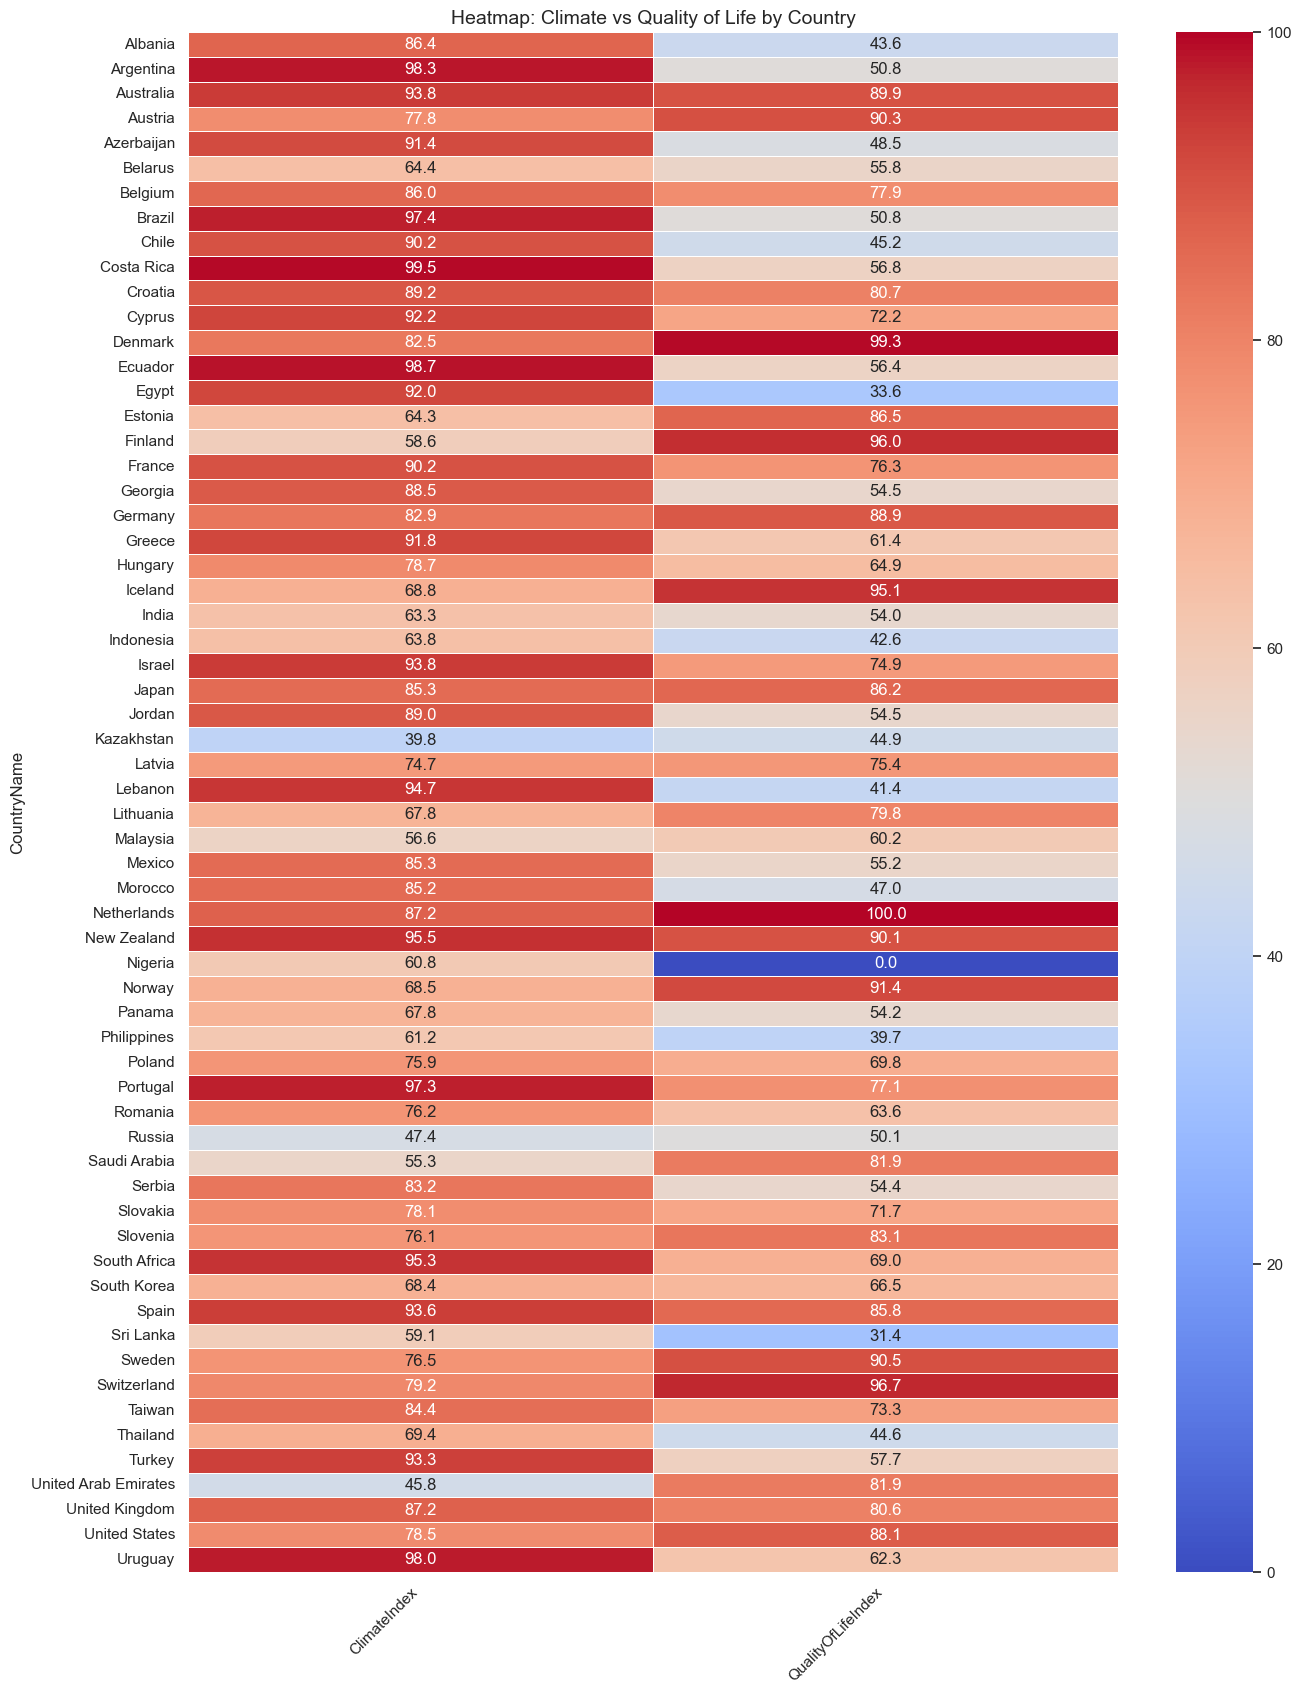

In [74]:
heatmap_data = subset[['CountryName', 'ClimateIndex', 'QualityOfLifeIndex']]

heatmap_data.set_index('CountryName', inplace=True)

plt.figure(figsize=(15, 20))
sns.heatmap(
    heatmap_data, 
    cmap="coolwarm", 
    annot=True,  
    fmt=".1f",   
    linewidths=0.5
)

plt.title("Heatmap: Climate vs Quality of Life by Country", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


c:\Users\iulia\anaconda3\envs\general_practice\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\iulia\anaconda3\envs\general_practice\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


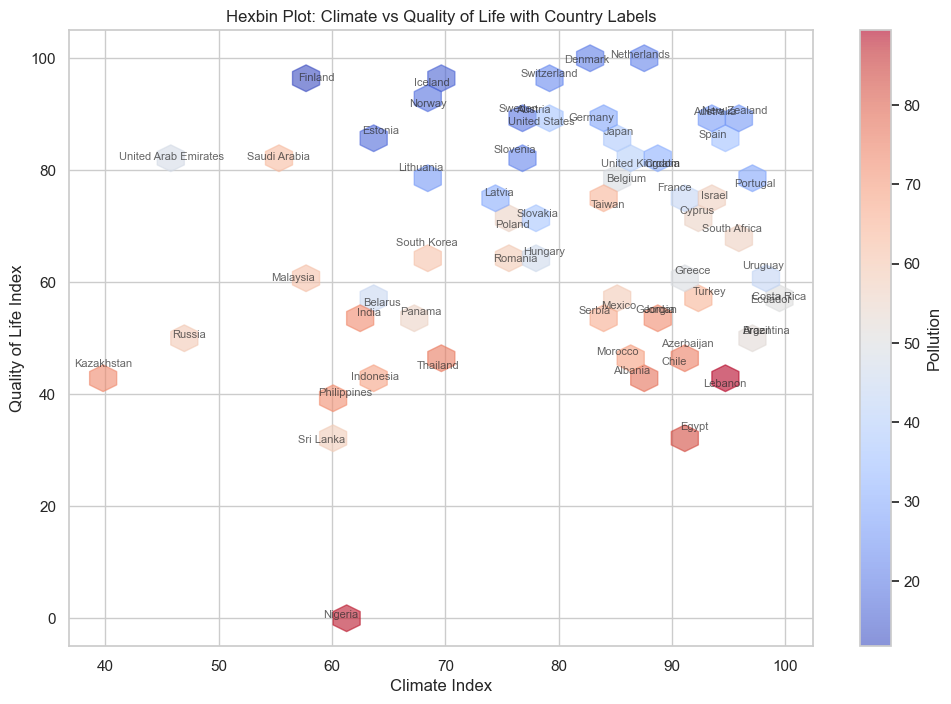

In [75]:
data = subset[['CountryName','ClimateIndex','QualityOfLifeIndex', 'PollutionIndex']]

plt.figure(figsize=(12, 8))
hb = plt.hexbin(
    data['ClimateIndex'], 
    data['QualityOfLifeIndex'], 
    data['PollutionIndex'],
    gridsize=25, cmap='coolwarm', alpha=0.6
)

for i, row in data.iterrows():
    plt.text(row['ClimateIndex'], row['QualityOfLifeIndex'], row['CountryName'], fontsize=8, ha='center', alpha=0.7)

plt.colorbar(hb, label="Pollution")
plt.xlabel("Climate Index")
plt.ylabel("Quality of Life Index")
plt.title("Hexbin Plot: Climate vs Quality of Life with Country Labels")
plt.grid(True)
plt.show()


### Safety vs Average Stay

In [76]:
subset = df[['CountryName', 'SafetyIndex', 'AverageStayDays']].dropna()
scaler = MinMaxScaler(feature_range = (0,100))
subset[['ScaledSafetyIndex', 'ScaledAverageStay']] = scaler.fit_transform(subset[['SafetyIndex', 'AverageStayDays']])

In [77]:
# Correlation between scaled variables
correlation = subset['ScaledAverageStay'].corr(subset['ScaledSafetyIndex'])
print('Correlation between Scaled Average Stay and Scaled Safety Index:', correlation)

Correlation between Scaled Average Stay and Scaled Safety Index: -0.258646774810228


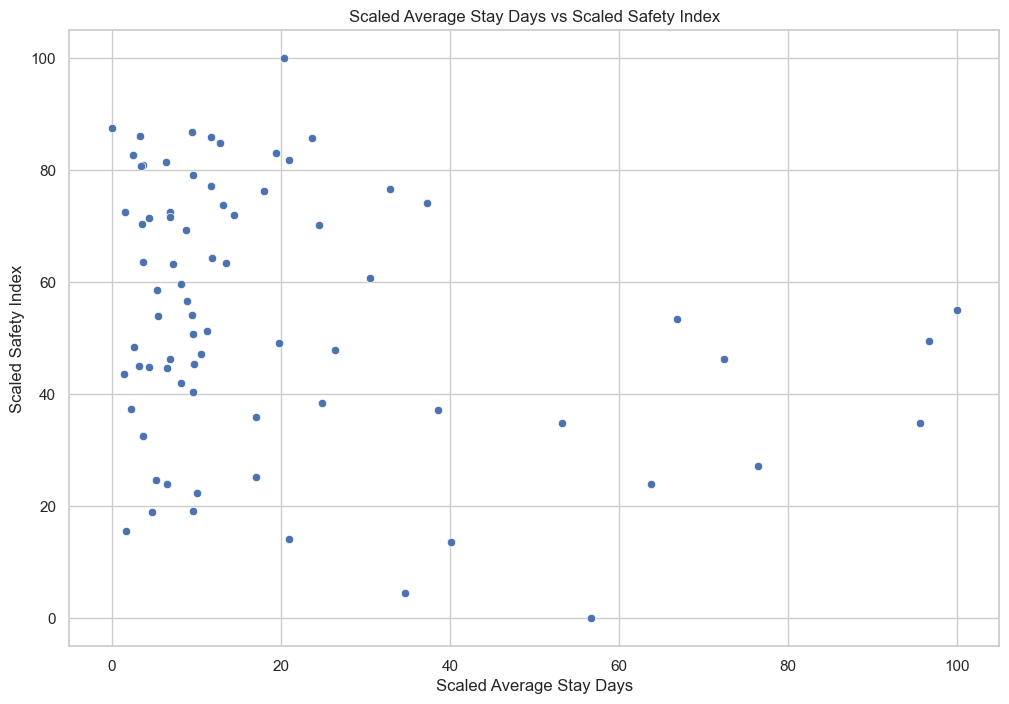

In [78]:
# %%
# Scatter plot with scaled data
plt.figure(figsize=(12, 8))

sns.scatterplot(x=subset['ScaledAverageStay'], y=subset['ScaledSafetyIndex'])
plt.title('Scaled Average Stay Days vs Scaled Safety Index')
plt.xlabel('Scaled Average Stay Days')
plt.ylabel('Scaled Safety Index')
plt.show()


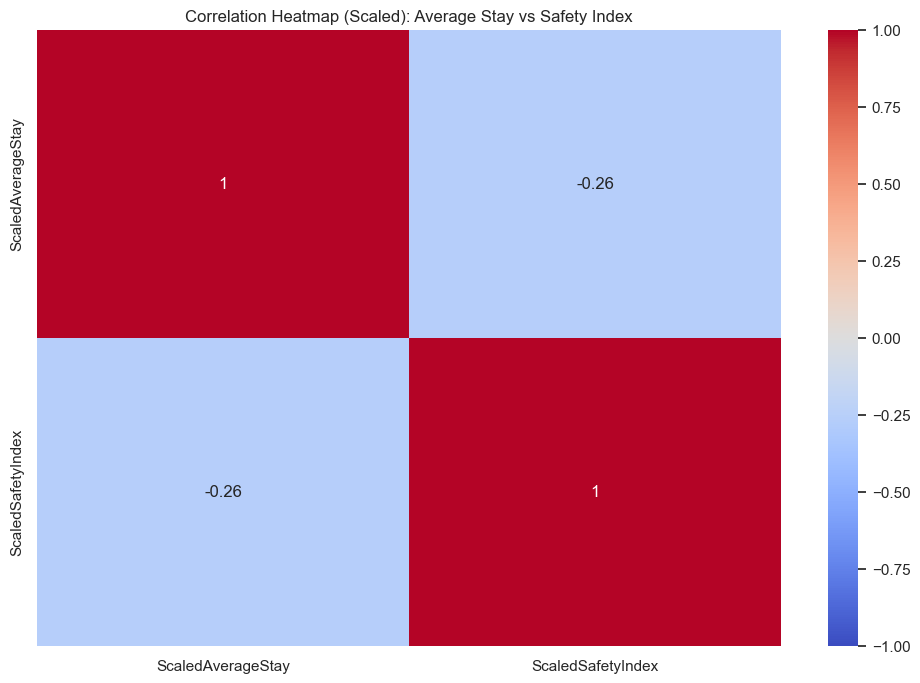

In [79]:
# %%
# Correlation heatmap (scaled)
corr = subset[['ScaledAverageStay', 'ScaledSafetyIndex']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Scaled): Average Stay vs Safety Index')
plt.show()


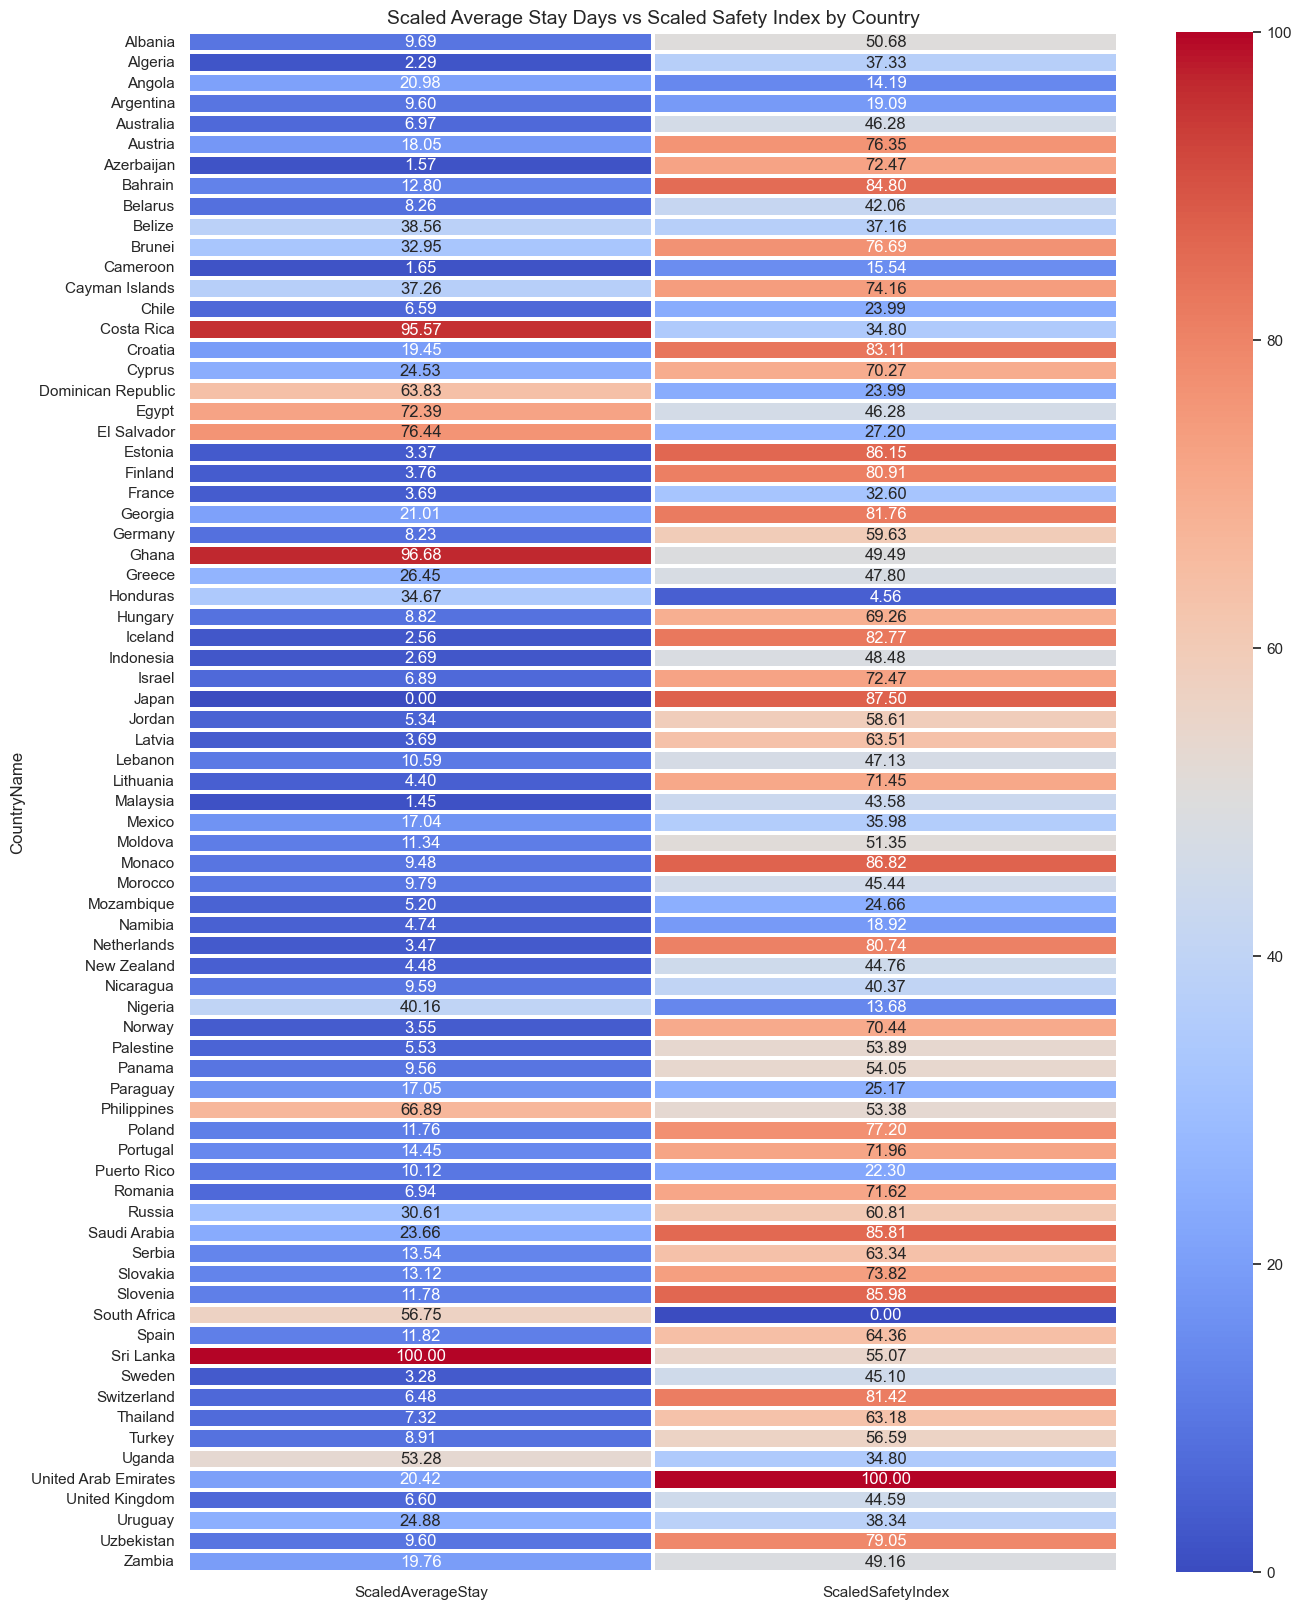

In [80]:
# %%
# Country-wise heatmap using scaled values
heatmap_data = subset[['CountryName', 'ScaledAverageStay', 'ScaledSafetyIndex']].copy()
heatmap_data.set_index('CountryName', inplace=True)

plt.figure(figsize=(15, 20))
sns.heatmap(
    heatmap_data,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=1.5
)
plt.title("Scaled Average Stay Days vs Scaled Safety Index by Country", fontsize=14)
plt.show()
